In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
mu = np.array([-0.00096,0.00036,-0.00123])
sigma = np.array([0.01383,0.01489,0.01344])
corr_mat = np.array([
    [1.0,   0.75539, 0.98819],
    [0.75539, 1.0,   0.84687],
    [0.98819, 0.84687, 1.0]
])
cov = np.outer(sigma, sigma) * corr_mat
cov

array([[0.00019127, 0.00015556, 0.00018368],
       [0.00015556, 0.00022171, 0.00016948],
       [0.00018368, 0.00016948, 0.00018063]])

In [41]:
n_days = 252
n_sims = 10000
n_assets = 3
returns = np.random.multivariate_normal(
    mean=mu,
    cov=cov,
    size=(n_sims, n_days)
)
returns.shape

(10000, 252, 3)

In [42]:
weights = np.array([0.4, 0.3, 0.3])
portfolio_returns = np.dot(returns, weights)
portfolio_returns.shape

(10000, 252)

In [43]:
initial_value = 100000

portfolio_paths = initial_value * np.exp(
    np.cumsum(portfolio_returns, axis=1)
)

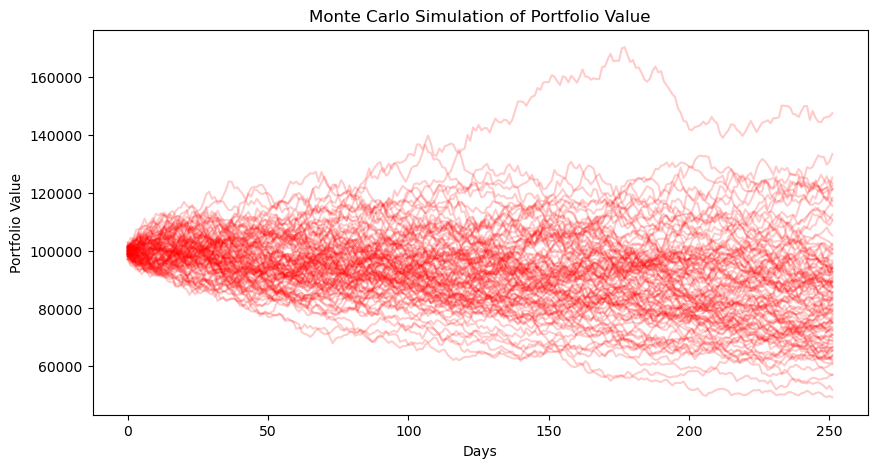

In [44]:
plt.figure(figsize=(10,5))
for i in range(100):
    plt.plot(portfolio_paths[i], color='red', alpha=0.2)

plt.title("Monte Carlo Simulation of Portfolio Value")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.show()


In [45]:
final_values = portfolio_paths[:, -1]
final_values

array([ 98836.2871428 ,  93953.87431149,  71141.785765  , ...,
       126251.37588746,  57505.15643639,  74539.92787517])

In [46]:
initial_value = 100000

prob_loss = np.mean(final_values < initial_value)
print(prob_loss*100,'%')


78.34 %


In [47]:
confidence_level = 0.95

VaR_95 = np.percentile(final_values, (1 - confidence_level) * 100)
VaR_95


60355.698423974885

In [48]:
VaR_95_loss = initial_value - VaR_95
VaR_95_loss


39644.301576025115

In [49]:
CVaR_95 = final_values[final_values <= VaR_95].mean()
CVaR_95


55370.449030613156

In [50]:
CVaR_95_loss = initial_value - CVaR_95
CVaR_95_loss


44629.550969386844

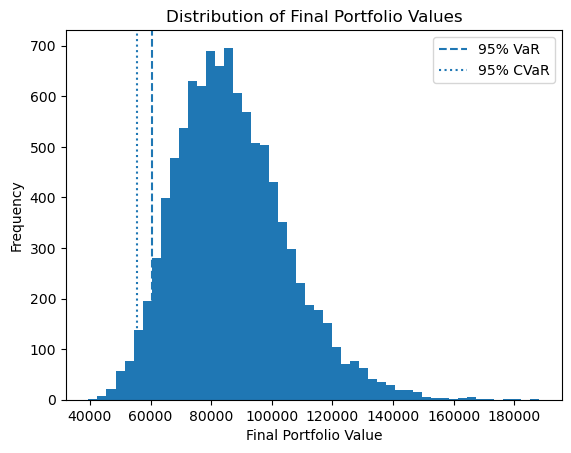

In [51]:
import matplotlib.pyplot as plt

plt.hist(final_values, bins=50)
plt.axvline(VaR_95, linestyle='--', label='95% VaR')
plt.axvline(CVaR_95, linestyle=':', label='95% CVaR')
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.title("Distribution of Final Portfolio Values")
plt.legend()
plt.show()


In [52]:
# Running maximum for each simulation
running_max = np.maximum.accumulate(portfolio_paths, axis=1)

# Drawdowns (negative numbers)
drawdowns = (portfolio_paths - running_max) / running_max

# Maximum drawdown per simulation (most negative point)
max_drawdowns = drawdowns.min(axis=1)

print("Running maximum for each simulation =",running_max)
print("drawdowns =",drawdowns)
print("Maximum Drawdown =",max_drawdowns)

Running maximum for each simulation = [[ 99733.02429037 101019.22819931 101939.87086302 ... 108087.44006467
  108087.44006467 108087.44006467]
 [101328.63340415 101328.63340415 101328.63340415 ... 105993.36897045
  105993.36897045 105993.36897045]
 [101634.71607786 101799.07424767 101799.07424767 ... 101799.07424767
  101799.07424767 101799.07424767]
 ...
 [ 99990.70099731 100842.00695901 100842.00695901 ... 127360.13794483
  127360.13794483 127360.13794483]
 [100548.71839305 100548.71839305 100548.71839305 ... 100548.71839305
  100548.71839305 100548.71839305]
 [101570.20578128 101570.20578128 102805.68918074 ... 105196.28053548
  105196.28053548 105196.28053548]]
drawdowns = [[ 0.          0.          0.         ... -0.06725894 -0.0776345
  -0.08558953]
 [ 0.         -0.00744134 -0.00551922 ... -0.1082907  -0.12808547
  -0.11358724]
 [ 0.          0.         -0.00358089 ... -0.31016395 -0.31194698
  -0.30115488]
 ...
 [ 0.          0.         -0.00478211 ... -0.01730815 -0.02069307
 

In [53]:
max_drawdowns_pct = max_drawdowns * 100


In [54]:
avg_max_dd = np.mean(max_drawdowns_pct)
avg_max_dd


-27.487284360272096

In [55]:
worst_dd = np.min(max_drawdowns_pct)
worst_dd


-61.890291046484755

In [56]:
prob_20_dd = np.mean(max_drawdowns_pct <= -20)
prob_20_dd


0.7576

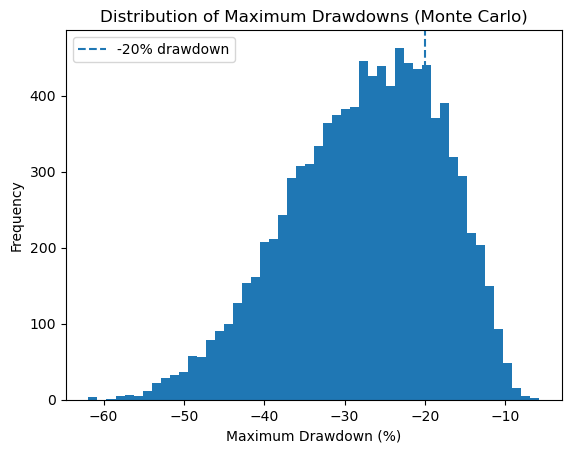

In [57]:
import matplotlib.pyplot as plt

plt.hist(max_drawdowns_pct, bins=50)
plt.axvline(-20, linestyle='--', label='-20% drawdown')
plt.xlabel("Maximum Drawdown (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Maximum Drawdowns (Monte Carlo)")
plt.legend()
plt.show()
